In [ ]:
pip install scikit-learn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction import DictVectorizer

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [16]:
import mlflow
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('project')

2024/02/19 15:22:47 INFO mlflow.tracking.fluent: Experiment with name 'project' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/User/Orchestration/MLOp/My_Project/mlruns/1', creation_time=1708356167781, experiment_id='1', last_update_time=1708356167781, lifecycle_stage='active', name='project', tags={}>

In [17]:
def read_dataframe(filename):
    lab = pd.read_csv(filename)

    lab = lab[lab.job_category == 'Data Science and Research']
    lab = lab[(lab.salary_in_usd >= 1000) & (lab.salary_in_usd <= 500000)]

    categ = ['experience_level', 'employment_type']
    lab[categ] = lab[categ].astype(str)
    
    return lab

In [18]:
lab_train = read_dataframe('jobs_in_data.2023')
lab_val = read_dataframe('jobs_in_data.2022')

In [5]:
len(lab_train),len(lab_val)

(2413, 500)

In [6]:
lab_train['EXP_EMP'] = lab_train['experience_level'] + ', ' + lab_train['employment_type']
lab_val['EXP_EMP'] = lab_val['experience_level'] + ', ' + lab_val['employment_type']
lab_val.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,EXP_EMP
0,2022,AI Research Engineer,Data Science and Research,GBP,30000,36940,United Kingdom,Entry-level,Full-time,Remote,United Kingdom,L,"Entry-level, Full-time"
3,2022,Research Engineer,Data Science and Research,EUR,15662,16455,Russia,Entry-level,Full-time,Remote,Russia,M,"Entry-level, Full-time"
5,2022,Data Science Manager,Data Science and Research,USD,190000,190000,United States,Senior,Full-time,Remote,United States,L,"Senior, Full-time"
6,2022,Data Scientist,Data Science and Research,GBP,45000,55410,France,Mid-level,Full-time,Remote,United Kingdom,M,"Mid-level, Full-time"
7,2022,Research Engineer,Data Science and Research,EUR,100000,105066,United Kingdom,Mid-level,Full-time,Hybrid,United Kingdom,S,"Mid-level, Full-time"


In [7]:
categ = ['EXP_EMP']
num = ['salary_in_usd']
dv = DictVectorizer()

train_dicts = lab_train[categ + num].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = lab_val[categ + num].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [8]:
target = 'salary_in_usd'
y_train = lab_train[target].values
y_val = lab_val[target].values

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

1.077856931521976e-06

In [10]:
if not os.path.exists('models'):
    os.makedirs('models')

# original code to save the file
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

NameError: name 'os' is not defined

In [ ]:
lr = Lasso(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.6771484256233237e-08

In [11]:
lr = Ridge(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

1.0778753296166195e-06

In [ ]:
target = 'salary_in_usd'
y_train = lab[target].values

In [ ]:
sns.distplot(lab.salary_in_usd)

In [ ]:
lab.salary_in_usd.describe()

C:\Users\User\AppData\Local\Temp\ipykernel_3708\171497011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\User\AppData\Local\Temp\ipykernel_3708\171497011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


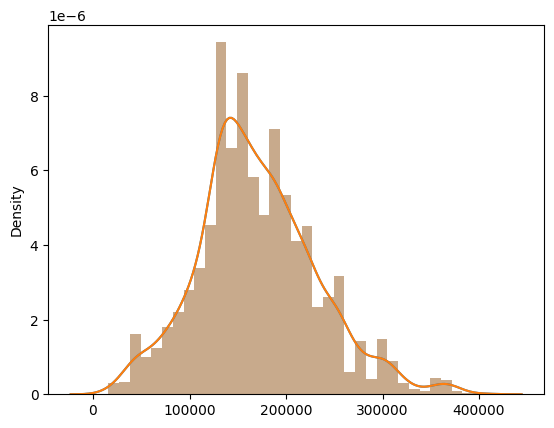

In [21]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.show()